In [1]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
import math

# Method 1: Cluster White Pixels In Neighbourhoods of Monky

In [2]:
def getClusters(edges):
    testArr = np.copy(edges)
    squareSize = 21
    n, m = testArr.shape
    for i in range(n//squareSize):
        for j in range(m//squareSize):
            nbWhitePixels = 0
            xAvg, yAvg = 0, 0
            for k in range(squareSize):
                for l in range(squareSize):
                    if(testArr[i * squareSize + k][j * squareSize + l] >= 200):
                        nbWhitePixels += 1
                        testArr[i * squareSize + k][j * squareSize + l] = 0

                        xAvg += k
                        yAvg += l

            starRadius = int(math.sqrt(nbWhitePixels)) + 2
            if(starRadius < 3):
                continue

            xAvg = xAvg // nbWhitePixels
            yAvg = yAvg // nbWhitePixels

            for k in range(- starRadius//2, starRadius//2):
                for l in range(- starRadius//2, starRadius//2):
                    if(abs(k) + abs(l) < starRadius//2):
                        testArr[i * squareSize + (xAvg) + k][j * squareSize + (yAvg) + l] = 255
    return testArr

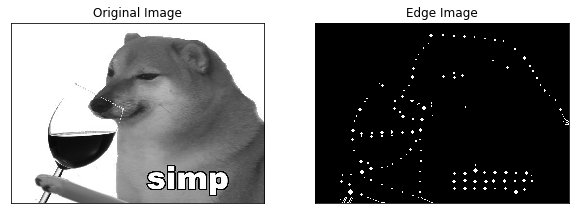

In [3]:
plt.rcParams["figure.figsize"] = (10,30)

img = cv2.imread('doge.jpg',0)
edges = getClusters(cv2.Canny(img,100,200))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

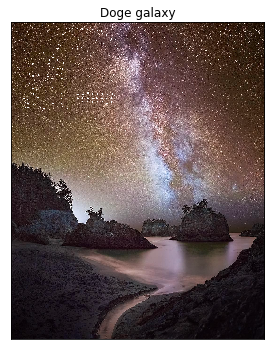

In [4]:
space = cv2.imread('space1.jpg')

for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i][j] == 255:
            space[i][j] = 255
            
cv2.imwrite("filename1.jpg", space)
        
plt.subplot(121),plt.imshow(space)
plt.title('Doge galaxy'), plt.xticks([]), plt.yticks([])
plt.show()